## Import libraries

In [1]:
# Importing essential libraries for data manipulation, visualization, and modeling
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating static visualizations
import sweetviz as sv  # For automated EDA (Exploratory Data Analysis)
import seaborn as sns  # For advanced visualizations
import optuna  # For hyperparameter optimization
import lightgbm as lgb  # For LightGBM classifier
import xgboost as xgb  # For XGBoost classifier
from sklearn.ensemble import VotingClassifier  # For combining multiple models (ensemble learning)
from xgboost import XGBClassifier  # Importing XGBoost classifier
from lightgbm import LGBMClassifier  # Importing LightGBM classifier

# Importing utilities for splitting data, preprocessing, and clustering
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.compose import ColumnTransformer  # For preprocessing specific columns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder  # For scaling numerical data and encoding categorical data
from sklearn.base import BaseEstimator, TransformerMixin  # For custom transformations
from sklearn.pipeline import Pipeline  # For creating data preprocessing pipelines
from sklearn.cluster import KMeans  # For clustering data

# Metrics for model evaluation
from sklearn.metrics import roc_curve, roc_auc_score  # For ROC curve and AUC score
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.svm import SVR  # Support Vector Regressor (optional)
from sklearn.metrics import accuracy_score  # For calculating model accuracy
from sklearn.model_selection import cross_val_score, StratifiedKFold  # For cross-validation and stratified splitting
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text to numerical representation (TF-IDF)

# Libraries for building and evaluating deep learning models
import tensorflow as tf  # Core TensorFlow library
from tensorflow.keras.models import Sequential  # Sequential API for building deep learning models
from tensorflow.keras.layers import Dense, Dropout  # Dense and Dropout layers for building neural networks
from tensorflow.keras.optimizers import Adam  # Optimizer for training deep learning models
from sklearn.metrics import roc_auc_score  # AUC score metric
from scikeras.wrappers import KerasClassifier  # Wrapper for integrating Keras models with scikit-learn

# Libraries for text analysis
from wordcloud import WordCloud  # For creating word clouds from text data
from textblob import TextBlob  # For text sentiment analysis
import re  # For text preprocessing using regular expressions
import emoji  # For handling emojis in text
import nltk  # Natural Language Toolkit for text preprocessing
nltk.download('punkt')  # Downloading tokenizer for text tokenization
nltk.download('averaged_perceptron_tagger')  # Downloading POS tagger for part-of-speech tagging
import joblib  # For saving and loading models

# Display all columns in the output
pd.set_option('display.max_columns', None)

# Suppress warnings to keep the notebook clean
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshsharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/harshsharma/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load data

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
# Drop 'id' or other columns not used for prediction (if not part of the original training dataset features)
test_data = test_data.drop(columns=['id'], errors='ignore')

In [4]:
train_data.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target
0,2012-01-15 23:40:09,True,False,Cosplayer/Fitness lover. Come to me https://t....,74,7,0,False,465096524,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9666745212...,reml5477,20,False,0.006,3138,1
1,2016-10-04 00:44:39,False,False,pobody’s nerfect,50443,164,590,True,783105517673648132,cy,she/her,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1281752126...,kinlibra,6469,False,4.572,1415,0
2,2009-05-23 04:04:13,False,False,gracias por participar 🏅,9394,208,189,False,41970759,es,La diaspora,http://abs.twimg.com/images/themes/theme17/bg.gif,http://pbs.twimg.com/profile_images/1233811596...,_delaualau,30296,False,7.378,4106,0
3,2009-05-17 04:31:31,False,False,Stand Up Comedian/Actor from North Philadelphi...,46,66180,1090,True,40607946,en,"Calabasas, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1184851104...,SpankHorton,164957,False,40.116,4112,0
4,2009-02-16 13:11:21,True,False,Assignment Editor at NBC10 and President of Ja...,1223,487,867,True,20983433,en,"Jenkintown, PA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5234863934...,javelinjt,1752,False,0.417,4201,0


In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
favourites_count,26206.0,1.215997e+04,3.362895e+04,0.0,3.470000e+02,2.037000e+03,8.751750e+03,8.399290e+05
followers_count,26206.0,3.732983e+05,2.515996e+06,0.0,3.400000e+01,3.540000e+02,8.241500e+03,1.216415e+08
friends_count,26206.0,4.427275e+03,4.602204e+04,0.0,3.400000e+01,2.920000e+02,8.780000e+02,1.641962e+06
id,26206.0,1.253306e+17,3.035728e+17,586.0,9.799366e+07,3.997210e+08,2.480241e+09,1.120974e+18
statuses_count,26206.0,2.072485e+04,6.345569e+04,0.0,1.331000e+03,4.143500e+03,1.679150e+04,2.771910e+06
average_tweets_per_day,26206.0,6.754636e+00,2.278275e+01,0.0,4.862500e-01,1.464000e+00,5.460000e+00,1.191286e+03
account_age_days,26206.0,3.017871e+03,1.018959e+03,483.0,2.302000e+03,3.218000e+03,3.895000e+03,5.151000e+03
target,26206.0,3.351523e-01,4.720527e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26206 entries, 0 to 26205
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    26206 non-null  object 
 1   default_profile               26206 non-null  bool   
 2   default_profile_image         26206 non-null  bool   
 3   description                   21115 non-null  object 
 4   favourites_count              26206 non-null  int64  
 5   followers_count               26206 non-null  int64  
 6   friends_count                 26206 non-null  int64  
 7   geo_enabled                   26206 non-null  bool   
 8   id                            26206 non-null  int64  
 9   lang                          20618 non-null  object 
 10  location                      26204 non-null  object 
 11  profile_background_image_url  22971 non-null  object 
 12  profile_image_url             26205 non-null  object 
 13  s

In [7]:
print(train_data.shape, test_data.shape)

(26206, 19) (11232, 18)


## Exploratory Data Analysis

In [8]:
# # Generate an automated Exploratory Data Analysis (EDA) report using Sweetviz
# train_report = sv.analyze(train_data)  # Analyze the training dataset

# # Save the generated report as an interactive HTML file and open it in the browser
# train_report.show_html('train_report.html')  # Creates 'train_report.html' file for detailed visualization

In [9]:
# # Generate an automated Exploratory Data Analysis (EDA) report for the test dataset using Sweetviz
# test_report = sv.analyze(test_data)  # Analyze the test dataset

# # Save the generated report as an interactive HTML file and open it in the browser
# test_report.show_html('test_report.html')  # Creates 'test_report.html' file for detailed visualization

In [10]:
# Calculate the percentage of missing values for each column in the training dataset
null_columns_percentage_train = train_data.isnull().sum() * 100 / len(train_data)

# Calculate the percentage of missing values for each column in the test dataset
null_columns_percentage_test = test_data.isnull().sum() * 100 / len(test_data)

In [11]:
# Display missing value percentages for training data
print("Missing values in training data:")
print(null_columns_percentage_train[null_columns_percentage_train > 0])

# Display missing value percentages for test data
print("\nMissing values in test data:")
print(null_columns_percentage_test[null_columns_percentage_test > 0])

Missing values in training data:
description                     19.426849
lang                            21.323361
location                         0.007632
profile_background_image_url    12.344501
profile_image_url                0.003816
dtype: float64

Missing values in test data:
description                     19.284188
lang                            21.091524
location                         0.017806
profile_background_image_url    11.253561
dtype: float64


In [12]:
def show_graphs(df):
    # Count the occurrences of each class (fraudulent and non-fraudulent transactions)
    bot_counts = df['target'].value_counts()

    # Create a figure with two subplots arranged in a single row
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

    # Pie chart to show the percentage distribution of transaction classes
    ax1.pie(bot_counts, 
            labels=['Legit', 'Bot'],  # Labels for each class
            colors=['#1f77b4', '#ff7f0e'],
            autopct='%1.1f%%')  # Display percentages with one decimal point
    ax1.set_title('Bot Class Distribution')

    # Bar plot to show the absolute count of each transaction class
    ax2.bar(['Legit', 'Bot'],  # Labels for each class
            bot_counts.values,  # Corresponding counts
            color=['#1f77b4', '#ff7f0e'])  
    ax2.set_xlabel('Target Class')  # X-axis label
    ax2.set_ylabel('Number of Accounts')  # Y-axis label
    ax2.set_title('Bot Detection')  # Title for the bar plot

    # Add labels to the bars indicating the count
    for i in ax2.containers:
        ax2.bar_label(i)

    # Display the plots
    plt.show()

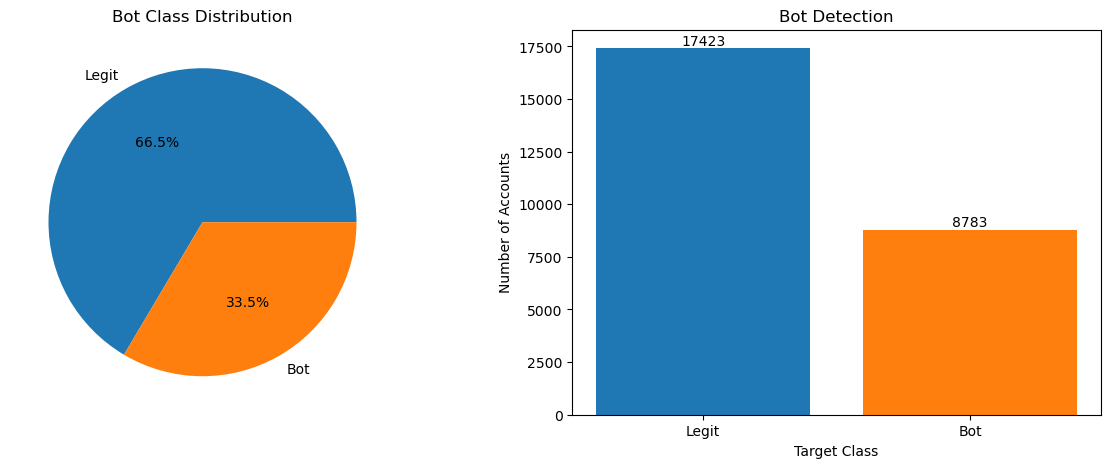

In [13]:
show_graphs(train_data)

<Axes: >

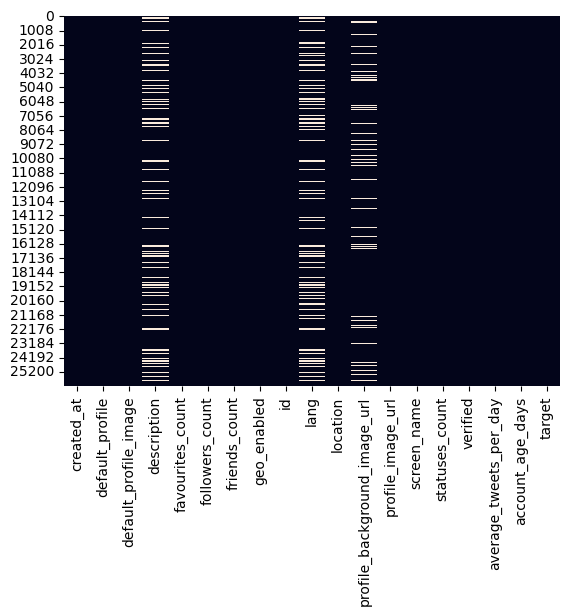

In [14]:
sns.heatmap(train_data.isnull(), cbar=False)

## Univariate Analysis

In [15]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns

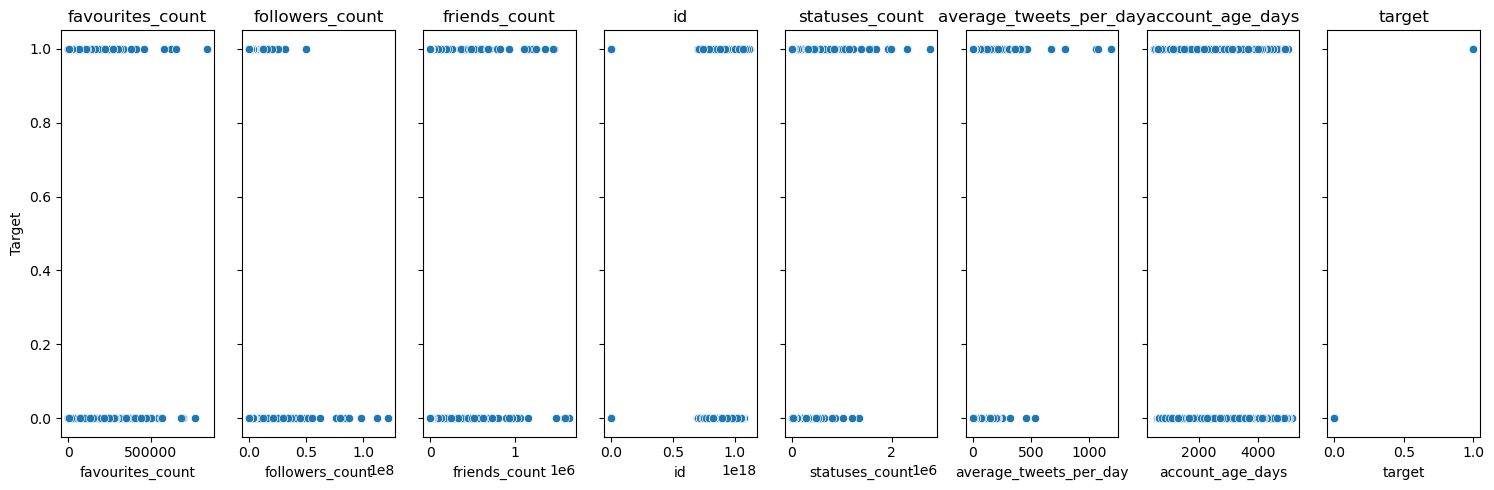

In [16]:
# Number of numerical features
num_features = len(numerical_features)

# Create subplots to visualize scatter plots for all numerical features
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5), sharey=True)

# Loop through each numerical feature and create scatter plots
for i, feature in enumerate(numerical_features):
    # Create scatter plot for the current feature vs target
    sns.scatterplot(ax=axes[i], x=feature, y='target', data=train_data)
    
    # Set the title for each subplot to the feature name
    axes[i].set_title(feature)
    
    # Label the x-axis with the feature name
    axes[i].set_xlabel(feature)
    
    # Label the y-axis with 'Target' only for the first plot
    axes[i].set_ylabel('Target' if i == 0 else '')

# Adjust subplot layout to prevent overlap
plt.tight_layout()

# Display all plots
plt.show()

## Multivariate Analysis

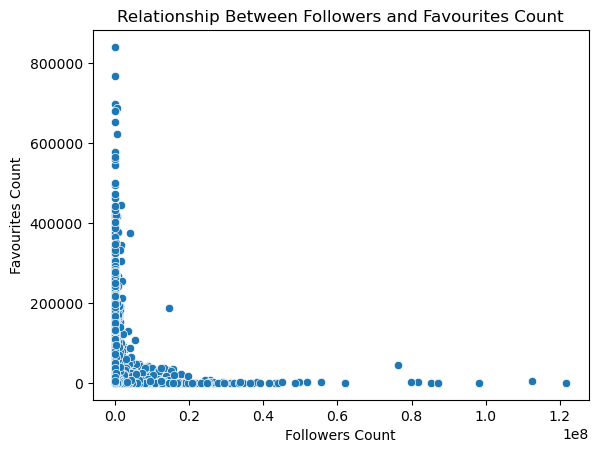

In [17]:
sns.scatterplot(x='followers_count', y='favourites_count', data=train_data)
plt.title('Relationship Between Followers and Favourites Count')
plt.xlabel('Followers Count')
plt.ylabel('Favourites Count')
plt.show()

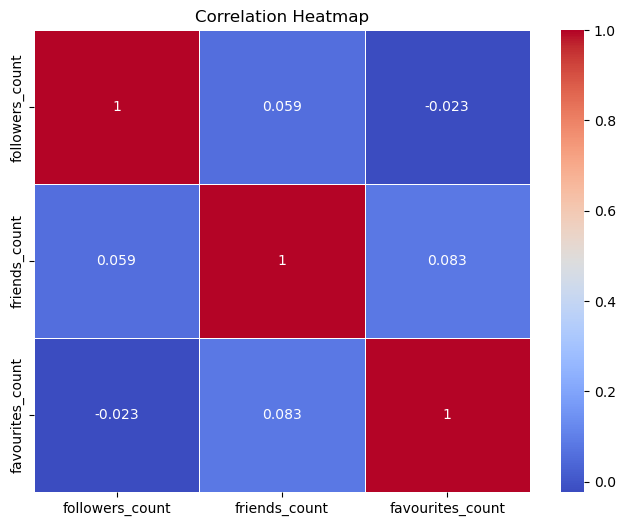

In [18]:
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(train_data[['followers_count', 'friends_count', 'favourites_count']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Text Analysis

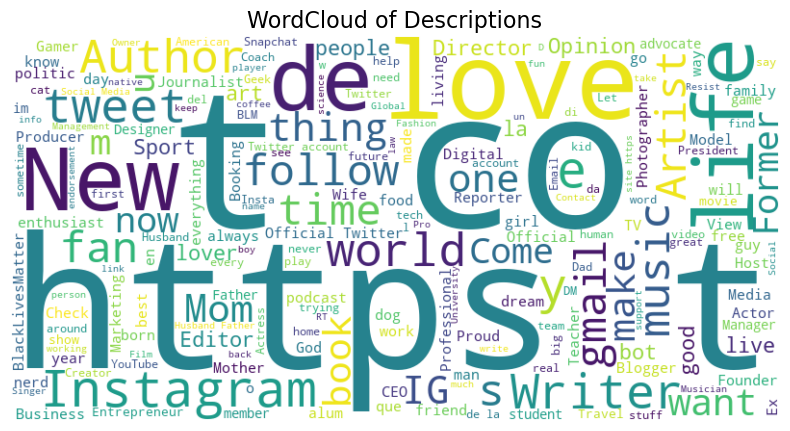

In [19]:
wc = WordCloud(
    background_color='white',  # Set background color
    max_words=200,            # Limit the number of words
    width=800, height=400,    # Set width and height of the canvas
    colormap='viridis'        # Set color scheme
).generate(' '.join(train_data['description'].dropna()))

plt.figure(figsize=(10, 5))  # Adjust figure size
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')              # Turn off axis
plt.title("WordCloud of Descriptions", fontsize=16)
plt.show()

## Feature Engineering

In [20]:
# Fill missing values in the specified columns of the training dataset
train_data['description'].fillna("Unknown", inplace=True)  # Replace missing 'description' values with "Unknown"
train_data['location'].fillna("Unknown", inplace=True)     # Replace missing 'location' values with "Unknown"
train_data['lang'].fillna("Unknown", inplace=True)         # Replace missing 'lang' values with "Unknown"
train_data['profile_background_image_url'].fillna("Unknown", inplace=True)  # Replace missing 'profile_background_image_url' with "Unknown"
train_data['profile_image_url'].fillna("Unknown", inplace=True)  # Replace missing 'profile_image_url' with "Unknown"

# Repeat the same process for the test dataset
test_data['description'].fillna("Unknown", inplace=True)  # Replace missing 'description' values with "Unknown"
test_data['location'].fillna("Unknown", inplace=True)     # Replace missing 'location' values with "Unknown"
test_data['lang'].fillna("Unknown", inplace=True)         # Replace missing 'lang' values with "Unknown"
test_data['profile_background_image_url'].fillna("Unknown", inplace=True)  # Replace missing 'profile_background_image_url' with "Unknown"
test_data['profile_image_url'].fillna("Unknown", inplace=True)  # Replace missing 'profile_image_url' with "Unknown"

In [21]:
# Create binary columns in the training dataset to indicate the presence of meaningful content
train_data['has_description'] = train_data['description'].apply(lambda x: 0 if x == "Unknown" else 1)  # 1 if description exists, else 0
train_data['has_profile_background_image_url'] = train_data['profile_background_image_url'].apply(lambda x: 0 if x == "Unknown" else 1)  # 1 if background image exists, else 0
train_data['has_lang'] = train_data['lang'].apply(lambda x: 0 if x == "Unknown" else 1)  # 1 if language exists, else 0
train_data['has_location'] = train_data['location'].apply(lambda x: 0 if x == "Unknown" or x == "unknown" else 1)  # 1 if location exists, else 0

# Repeat the same process for the test dataset
test_data['has_description'] = test_data['description'].apply(lambda x: 0 if x == "Unknown" else 1)  # 1 if description exists, else 0
test_data['has_profile_background_image_url'] = test_data['profile_background_image_url'].apply(lambda x: 0 if x == "Unknown" else 1)  # 1 if background image exists, else 0
test_data['has_lang'] = test_data['lang'].apply(lambda x: 0 if x == "Unknown" else 1)  # 1 if language exists, else 0
test_data['has_location'] = test_data['location'].apply(lambda x: 0 if x == "Unknown" or x == "unknown" else 1)  # 1 if location exists, else 0

In [22]:
# Convert 'created_at' to datetime format for both train and test datasets
train_data['created_at'] = pd.to_datetime(train_data['created_at'])
test_data['created_at'] = pd.to_datetime(test_data['created_at'])

# Extract useful features from the 'created_at' column in the training dataset
train_data['creation_year'] = train_data['created_at'].dt.year  # Extracts the year (e.g., 2023)
train_data['creation_month'] = train_data['created_at'].dt.month  # Extracts the month (1 = January, ..., 12 = December)
train_data['creation_day_of_week'] = train_data['created_at'].dt.dayofweek  # Extracts the day of the week (0 = Monday, ..., 6 = Sunday)
train_data['creation_hour'] = train_data['created_at'].dt.hour  # Extracts the hour of the day (if time granularity matters)

# Extract useful features from the 'created_at' column in the test dataset
test_data['creation_year'] = test_data['created_at'].dt.year  # Extracts the year
test_data['creation_month'] = test_data['created_at'].dt.month  # Extracts the month
test_data['creation_day_of_week'] = test_data['created_at'].dt.dayofweek  # Extracts the day of the week
test_data['creation_hour'] = test_data['created_at'].dt.hour  # Extracts the hour of the day

In [23]:
# Text length: Calculates the total number of characters in the 'description' column
train_data['description_length'] = train_data['description'].apply(len)

# Word count: Calculates the total number of words in the 'description' column
train_data['description_word_count'] = train_data['description'].apply(lambda x: len(str(x).split()))

# Character count: Calculates the total number of characters in the 'description' column (alternative to `len`)
train_data['description_character_count'] = train_data['description'].apply(lambda x: len(str(x)))

# Average word length: Calculates the average word length in the 'description' column
train_data['avg_word_length'] = train_data['description'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

# Has URL: Checks if the 'description' column contains a URL (e.g., "http") and creates a binary feature (1 = URL present, 0 = not present)
train_data['has_url'] = train_data['description'].apply(lambda x: int('http' in str(x)))

In [24]:
# Text length: Calculates the total number of characters in the 'description' column
test_data['description_length'] = test_data['description'].apply(len)

# Word count: Calculates the total number of words in the 'description' column
test_data['description_word_count'] = test_data['description'].apply(lambda x: len(str(x).split()))

# Character count: Calculates the total number of characters in the 'description' column (alternative to `len`)
test_data['description_character_count'] = test_data['description'].apply(lambda x: len(str(x)))

# Average word length: Calculates the average word length in the 'description' column
test_data['avg_word_length'] = test_data['description'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

# Has URL: Checks if the 'description' column contains a URL (e.g., "http") and creates a binary feature (1 = URL present, 0 = not present)
test_data['has_url'] = test_data['description'].apply(lambda x: int('http' in str(x)))

In [25]:
# Log transformation for 'favourites_count'
train_data['favourites_count_log'] = np.log1p(train_data['favourites_count'])

# Log transformation for 'followers_count'
train_data['followers_count_log'] = np.log1p(train_data['followers_count'])

# Log transformation for 'friends_count'
train_data['friends_count_log'] = np.log1p(train_data['friends_count'])

# Log transformation for 'statuses_count'
train_data['statuses_count_log'] = np.log1p(train_data['statuses_count'])

# Log transformation for 'average_tweets_per_day'
train_data['average_tweets_per_day_log'] = np.log1p(train_data['average_tweets_per_day'])

# Log transformation for 'account_age_days'
train_data['account_age_days_log'] = np.log1p(train_data['account_age_days'])

In [26]:
# Log transformation for 'favourites_count'
test_data['favourites_count_log'] = np.log1p(test_data['favourites_count'])

# Log transformation for 'followers_count'
test_data['followers_count_log'] = np.log1p(test_data['followers_count'])

# Log transformation for 'friends_count'
test_data['friends_count_log'] = np.log1p(test_data['friends_count'])

# Log transformation for 'statuses_count'
test_data['statuses_count_log'] = np.log1p(test_data['statuses_count'])

# Log transformation for 'average_tweets_per_day'
test_data['average_tweets_per_day_log'] = np.log1p(test_data['average_tweets_per_day'])

# Log transformation for 'account_age_days'
test_data['account_age_days_log'] = np.log1p(test_data['account_age_days'])

In [27]:
# Identify boolean columns in the training dataset
binary_columns = train_data.select_dtypes(include=['boolean']).columns

# Loop through each boolean column to convert "True"/"False" strings to 1/0
for col in binary_columns:
    # Replace "True" with 1 and "False" with 0 in the training dataset and convert to integer
    train_data[col] = train_data[col].replace({'True': 1, 'False': 0}).astype(int)

    # Replace "True" with 1 and "False" with 0 in the test dataset and convert to integer
    test_data[col] = test_data[col].replace({'True': 1, 'False': 0}).astype(int)

In [28]:
# Calculate the length of the description column, filling missing values with an empty string
train_data['description_length'] = train_data['description'].fillna("").apply(len)

# Create a binary column to indicate the presence of a URL in the description
train_data['description_has_url'] = train_data['description'].apply(lambda x: 1 if 'http' in str(x) else 0)

# Apply TF-IDF vectorization on the description column with a maximum of 200 features
tfidf = TfidfVectorizer(max_features=200)
description_tfidf = tfidf.fit_transform(train_data['description'].fillna("")).toarray()  # Generate TF-IDF matrix
tfidf_df = pd.DataFrame(description_tfidf, columns=[f'tfidf_{i}' for i in range(200)])  # Convert to DataFrame
train_data = pd.concat([train_data, tfidf_df], axis=1)  # Add TF-IDF features to the training dataset

# Save the TF-IDF vectorizer to a file for future use
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Load the saved TF-IDF vectorizer
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Calculate the length of the description column in the test dataset
test_data['description_length'] = test_data['description'].fillna("").apply(len)

# Create a binary column to indicate the presence of a URL in the description for the test dataset
test_data['description_has_url'] = test_data['description'].apply(lambda x: 1 if 'http' in str(x) else 0)

# Apply the saved TF-IDF vectorizer on the test dataset
description_tfidf = tfidf.transform(test_data['description'].fillna("")).toarray()  # Transform test data using the saved vectorizer
tfidf_df = pd.DataFrame(description_tfidf, columns=[f'tfidf_{i}' for i in range(200)])  # Convert to DataFrame
test_data = pd.concat([test_data.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)  # Add TF-IDF features to the test dataset

In [29]:
# Calculate the ratio of followers to friends in the training dataset
# Adding 1 to friends_count to avoid division by zero
train_data['followers_to_friends_ratio'] = train_data['followers_count'] / (train_data['friends_count'] + 1)

# Calculate the ratio of followers to friends in the test dataset
# Adding 1 to friends_count to avoid division by zero
test_data['followers_to_friends_ratio'] = test_data['followers_count'] / (test_data['friends_count'] + 1)

In [30]:
# Identify the top 25 most common locations in the training dataset
top_locations = train_data['location'].value_counts().index[:25]

# Replace locations in the training dataset with 'Other' if they are not in the top 25 locations
train_data['location'] = train_data['location'].apply(lambda x: x if x in top_locations else 'Other')

# Convert the 'location' column in the training dataset to one-hot encoded features
train_data = pd.get_dummies(train_data, columns=['location'], prefix='location')

# Define a list of all location columns for consistency, including 'Other'
location_columns = [f'location_{loc}' for loc in top_locations] + ['location_Other']

# Replace locations in the test dataset with 'Other' if they are not in the top 25 locations from the training dataset
test_data['location'] = test_data['location'].apply(lambda x: x if x in top_locations else 'Other')

# Convert the 'location' column in the test dataset to one-hot encoded features
test_data = pd.get_dummies(test_data, columns=['location'], prefix='location')

In [31]:
# Ensure all location columns from the training dataset are present in the test dataset
for col in location_columns:
    if col not in test_data.columns:
        test_data[col] = 0  # Add missing location columns to the test dataset and fill with 0

# Reorder the test dataset to match the order of location columns followed by other columns
test_data = test_data[location_columns + [col for col in test_data.columns if col not in location_columns]]

In [32]:
# Custom profile image indicator for training data
# Check if the profile image URL is custom (not from 'pbs.twimg.com')
train_data['has_custom_profile_image'] = train_data['profile_image_url'].apply(lambda x: 0 if 'pbs.twimg.com' in str(x) else 1)

# Custom profile background indicator for training data
# Check if the profile background image URL is custom (not from 'abs.twimg.com')
train_data['has_custom_background'] = train_data['profile_background_image_url'].apply(lambda x: 0 if 'abs.twimg.com' in str(x) else 1)

# Calculate a customization score for training data
# This score is based on the presence of a custom profile image, background, description, and location
train_data['customization_score'] = (
    train_data['has_custom_profile_image'] +
    train_data['has_custom_background'] +
    train_data['has_description'] +
    train_data['has_location']
)

# One-hot encode the language column in the training data
train_data = pd.get_dummies(train_data, columns=['lang'], prefix='lang')

# Save the list of one-hot encoded language columns for consistency
lang_columns = [col for col in train_data.columns if col.startswith('lang_')]

# Custom profile image indicator for test data
# Check if the profile image URL is custom (not from 'pbs.twimg.com')
test_data['has_custom_profile_image'] = test_data['profile_image_url'].apply(lambda x: 0 if 'pbs.twimg.com' in str(x) else 1)

# Custom profile background indicator for test data
# Check if the profile background image URL is custom (not from 'abs.twimg.com')
test_data['has_custom_background'] = test_data['profile_background_image_url'].apply(lambda x: 0 if 'abs.twimg.com' in str(x) else 1)

# Calculate a customization score for test data
# This score is based on the presence of a custom profile image, background, description, and location
test_data['customization_score'] = (
    test_data['has_custom_profile_image'] +
    test_data['has_custom_background'] +
    test_data['has_description'] +
    test_data['has_location']
)

# One-hot encode the language column in the test data
test_data = pd.get_dummies(test_data, columns=['lang'], prefix='lang')

In [33]:
# Ensure all language-related one-hot encoded columns in the training data are present in the test data
for col in lang_columns:
    # Check if the column from training data is missing in the test data
    if col not in test_data.columns:
        # Add the missing column to the test data and fill it with 0s
        test_data[col] = 0

In [34]:
# Reorder the columns in the test data to ensure that all language-related columns (lang_columns) come first
# Followed by the remaining columns in the test data
test_data = test_data[lang_columns + [col for col in test_data.columns if col not in lang_columns]]

In [35]:
# Calculate sentiment polarity for the description column in training data
# Polarity ranges from -1 (negative) to 1 (positive)
train_data['description_sentiment_polarity'] = train_data['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Calculate sentiment subjectivity for the description column in training data
# Subjectivity ranges from 0 (objective) to 1 (subjective)
train_data['description_sentiment_subjectivity'] = train_data['description'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Calculate sentiment polarity for the description column in test data
# Polarity ranges from -1 (negative) to 1 (positive)
test_data['description_sentiment_polarity'] = test_data['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Calculate sentiment subjectivity for the description column in test data
# Subjectivity ranges from 0 (objective) to 1 (subjective)
test_data['description_sentiment_subjectivity'] = test_data['description'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [36]:
# Calculate the number of capital letters in the description column for the training dataset
train_data['description_caps_count'] = train_data['description'].apply(lambda x: sum(1 for c in str(x) if c.isupper()))

# Calculate the number of capital letters in the description column for the test dataset
test_data['description_caps_count'] = test_data['description'].apply(lambda x: sum(1 for c in str(x) if c.isupper()))

# Define a mapping of punctuation marks to descriptive feature names
punctuation_map = {
    '!': 'exclamation',  # Count of exclamation marks
    '?': 'question',     # Count of question marks
    '#': 'hashtag',      # Count of hashtags
    '@': 'mention'       # Count of mentions
}

# Loop through the punctuation mapping to create new features for both training and test datasets
for punc, word in punctuation_map.items():
    # Count the occurrence of each punctuation in the description column of the training dataset
    train_data[f'description_num_{word}'] = train_data['description'].apply(lambda x: str(x).count(punc))
    # Count the occurrence of each punctuation in the description column of the test dataset
    test_data[f'description_num_{word}'] = test_data['description'].apply(lambda x: str(x).count(punc))

In [37]:
# Function to count the number of emojis in a given string
def count_emojis(s):
    return sum(1 for c in str(s) if c in emoji.EMOJI_DATA)

# Calculate the number of emojis in the description column for the training dataset
train_data['description_num_emojis'] = train_data['description'].apply(count_emojis)

# Calculate the number of emojis in the description column for the test dataset
test_data['description_num_emojis'] = test_data['description'].apply(count_emojis)

# Calculate the number of digits in the description column for the training dataset
train_data['description_num_digits'] = train_data['description'].apply(lambda x: sum(c.isdigit() for c in str(x)))

# Calculate the number of digits in the description column for the test dataset
test_data['description_num_digits'] = test_data['description'].apply(lambda x: sum(c.isdigit() for c in str(x)))

In [38]:
# Define a regular expression pattern to detect email addresses
email_pattern = re.compile(r'[^\s]+@[^\s]+')

# Check if the description column in the training dataset contains an email address
# Assign 1 if an email is found, otherwise 0
train_data['description_has_email'] = train_data['description'].apply(lambda x: 1 if re.search(email_pattern, str(x)) else 0)

# Check if the description column in the test dataset contains an email address
# Assign 1 if an email is found, otherwise 0
test_data['description_has_email'] = test_data['description'].apply(lambda x: 1 if re.search(email_pattern, str(x)) else 0)

In [39]:
# Calculate the ratio of followers to statuses in the training dataset
# Adding 1 to statuses_count to avoid division by zero
train_data['followers_statuses_ratio'] = train_data['followers_count'] / (train_data['statuses_count'] + 1)

# Calculate the ratio of followers to statuses in the test dataset
# Adding 1 to statuses_count to avoid division by zero
test_data['followers_statuses_ratio'] = test_data['followers_count'] / (test_data['statuses_count'] + 1)

# Calculate the ratio of friends to statuses in the training dataset
# Adding 1 to statuses_count to avoid division by zero
train_data['friends_statuses_ratio'] = train_data['friends_count'] / (train_data['statuses_count'] + 1)

# Calculate the ratio of friends to statuses in the test dataset
# Adding 1 to statuses_count to avoid division by zero
test_data['friends_statuses_ratio'] = test_data['friends_count'] / (test_data['statuses_count'] + 1)

In [40]:
# Calculate the average number of friends gained per day in the training dataset
# Adding 1 to account_age_days to avoid division by zero
train_data['friends_per_day'] = train_data['friends_count'] / (train_data['account_age_days'] + 1)

# Calculate the average number of friends gained per day in the test dataset
# Adding 1 to account_age_days to avoid division by zero
test_data['friends_per_day'] = test_data['friends_count'] / (test_data['account_age_days'] + 1)

# Calculate the average number of followers gained per day in the training dataset
# Adding 1 to account_age_days to avoid division by zero
train_data['followers_per_day'] = train_data['followers_count'] / (train_data['account_age_days'] + 1)

# Calculate the average number of followers gained per day in the test dataset
# Adding 1 to account_age_days to avoid division by zero
test_data['followers_per_day'] = test_data['followers_count'] / (test_data['account_age_days'] + 1)

# Calculate the average number of favourites received per day in the training dataset
# Adding 1 to account_age_days to avoid division by zero
train_data['favourites_per_day'] = train_data['favourites_count'] / (train_data['account_age_days'] + 1)

# Calculate the average number of favourites received per day in the test dataset
# Adding 1 to account_age_days to avoid division by zero
test_data['favourites_per_day'] = test_data['favourites_count'] / (test_data['account_age_days'] + 1)


In [41]:
# Calculate the engagement ratio in the training dataset
# Engagement ratio is defined as the sum of followers and friends divided by the number of statuses (adding 1 to avoid division by zero)
train_data['engagement_ratio'] = (train_data['followers_count'] + train_data['friends_count']) / (train_data['statuses_count'] + 1)

# Calculate the engagement ratio in the test dataset
# Engagement ratio is defined as the sum of followers and friends divided by the number of statuses (adding 1 to avoid division by zero)
test_data['engagement_ratio'] = (test_data['followers_count'] + test_data['friends_count']) / (test_data['statuses_count'] + 1)

In [42]:
# Define a function to count the number of proper nouns in a given text
def count_proper_nouns(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(str(text))
    # Tag each word with its part of speech
    tags = nltk.pos_tag(tokens)
    # Filter the words tagged as proper nouns (NNP)
    propernouns = [word for word, pos in tags if pos == 'NNP']
    # Return the count of proper nouns
    return len(propernouns)

# Apply the proper noun counting function to the 'description' column in the training dataset
train_data['description_num_propernouns'] = train_data['description'].apply(count_proper_nouns)

# Apply the proper noun counting function to the 'description' column in the test dataset
test_data['description_num_propernouns'] = test_data['description'].apply(count_proper_nouns)

In [43]:
train_data.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target,has_description,has_profile_background_image_url,has_lang,has_location,creation_year,creation_month,creation_day_of_week,creation_hour,description_length,description_word_count,description_character_count,avg_word_length,has_url,favourites_count_log,followers_count_log,friends_count_log,statuses_count_log,average_tweets_per_day_log,account_age_days_log,description_has_url,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,tfidf_10,tfidf_11,tfidf_12,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49,tfidf_50,tfidf_51,tfidf_52,tfidf_53,tfidf_54,tfidf_55,tfidf_56,tfidf_57,tfidf_58,tfidf_59,tfidf_60,tfidf_61,tfidf_62,tfidf_63,tfidf_64,tfidf_65,tfidf_66,tfidf_67,tfidf_68,tfidf_69,tfidf_70,tfidf_71,tfidf_72,tfidf_73,tfidf_74,tfidf_75,tfidf_76,tfidf_77,tfidf_78,tfidf_79,tfidf_80,tfidf_81,tfidf_82,tfidf_83,tfidf_84,tfidf_85,tfidf_86,tfidf_87,tfidf_88,tfidf_89,tfidf_90,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99,tfidf_100,tfidf_101,tfidf_102,tfidf_103,tfidf_104,tfidf_105,tfidf_106,tfidf_107,tfidf_108,tfidf_109,tfidf_110,tfidf_111,tfidf_112,tfidf_113,tfidf_114,tfidf_115,tfidf_116,tfidf_117,tfidf_118,tfidf_119,tfidf_120,tfidf_121,tfidf_122,tfidf_123,tfidf_124,tfidf_125,tfidf_126,tfidf_127,tfidf_128,tfidf_129,tfidf_130,tfidf_131,tfidf_132,tfidf_133,tfidf_134,tfidf_135,tfidf_136,tfidf_137,tfidf_138,tfidf_139,tfidf_140,tfidf_141,tfidf_142,tfidf_143,tfidf_144,tfidf_145,tfidf_146,tfidf_147,tfidf_148,tfidf_149,tfidf_150,tfidf_151,tfidf_152,tfidf_153,tfidf_154,tfidf_155,tfidf_156,tfidf_157,tfidf_158,tfidf_159,tfidf_160,tfidf_161,tfidf_162,tfidf_163,tfidf_164,tfidf_165,tfidf_166,tfidf_167,tfidf_168,tfidf_169,tfidf_170,tfidf_171,tfidf_172,tfidf_173,tfidf_174,tfidf_175,tfidf_176,tfidf_177,tfidf_178,tfidf_179,tfidf_180,tfidf_181,tfidf_182,tfidf_183,tfidf_184,tfidf_185,tfidf_186,tfidf_187,tfidf_188,tfidf_189,tfidf_190,tfidf_191,tfidf_192,tfidf_193,tfidf_194,tfidf_195,tfidf_196,tfidf_197,tfidf_198,tfidf_199,followers_to_friends_ratio,"location_Atlanta, GA","location_Boston, MA",location_Brasil,"location_Brooklyn, NY",location_California,"location_California, USA","location_Chicago, IL",location_Estados Unidos,"location_Florida, USA","location_Houston, TX",location_London,"location_London, England",location_Los Angeles,"location_Los Angeles, CA","location_Miami, FL",location_NYC,location_New York,location_New York City,"location_New York, NY",location_Other,"location_Philadelphia, PA","location_San Francisco, CA",location_USA,location_United States,"location_Washington, DC",location_unknown,has_custom_profile_image,has_custom_background,customization_score,lang_Unknown,lang_af,lang_ar,lang_bg,lang_ca,lang_cs,lang_cy,lang_da,lang_de,lang_el,lang_en,lang_es,lang_et,lang_fa,lang_fi,lang_fr,lang_he,lang_hi,lang_hr,lang_hu,lang_id,lang_it,lang_ja,lang_ko,lang_lt,lang_lv,lang_mk,lang_ne,lang_nl,lang_no,lang_pa,lang_pl,lang_pt,lang_ro,lang_ru,lang_sk,lang_sl,lang_so,lang_sq,lang_sv,lang_sw,lang_th,lang_tl,lang_tr,lang_uk,lang_ur,lang_vi,lang_zh-cn,lang_zh-tw,description_sentiment_polarity,description_sentiment_subjectivity,description_caps_count,description_num_exclamation,description_num_question,description_num_hashtag,description_num_mention,description_num_emojis,description_num_digits,description_has_email,followers_statuses_ratio,friends_statuses_ratio,friends_per_day,followers_per_day,favourites_per_day,engagement_ratio,description_num_propernouns
0,2012-01-15 

In [44]:
train_data.drop(columns=['id', 'screen_name', 'created_at', 'profile_background_image_url', 'profile_image_url'], inplace=True)

In [45]:
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

In [46]:
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['description'], dtype='object')

In [47]:
numerical_columns = numerical_columns.drop('target')

## Pipleine on train and test data

In [48]:
# Define a custom transformer for outlier removal in numerical columns
class Outlier_rem(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_columns):
        self.numerical_columns = numerical_columns

    def fit(self, X, y=None):
        # No fitting required for outlier removal
        return self

    def transform(self, X):
        X = X.copy()  # Create a copy of the data to avoid modifying the original
        for col in self.numerical_columns:
            # Calculate interquartile range (IQR) and determine lower and upper bounds
            q1 = X[col].quantile(0.25)
            q3 = X[col].quantile(0.75)
            iqr = q3 - q1
            lwr = q1 - (1.5 * iqr)
            upr = q3 + (1.5 * iqr)
            # Clip values outside the bounds
            X[col] = X[col].clip(lower=lwr, upper=upr)
        return X

# Define a custom transformer for ordinal encoding of categorical columns
class encoding(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns):
        self.categorical_columns = categorical_columns
        self.encoder = None  # Placeholder for the encoder instance

    def fit(self, X, y=None):
        # Initialize and fit the OrdinalEncoder
        self.encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        self.encoder.fit(X[self.categorical_columns])
        return self

    def transform(self, X):
        X = X.copy()  # Create a copy of the data to avoid modifying the original
        # Apply the fitted encoder to the categorical columns
        X[self.categorical_columns] = self.encoder.transform(X[self.categorical_columns])
        return X

# Define separate pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('outlier_removal', Outlier_rem(numerical_columns=numerical_columns)),  # Remove outliers
    ('scaling', StandardScaler())  # Scale numerical features
])

categorical_pipeline = Pipeline([
    ('label_encoding', encoding(categorical_columns=categorical_columns))  # Encode categorical features
])

# Combine the numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),  # Apply numerical pipeline to numerical columns
        ('cat', categorical_pipeline, categorical_columns)  # Apply categorical pipeline to categorical columns
    ]
)

# Create a full pipeline to preprocess the data
pipeline = Pipeline([
    ('preprocessing', preprocessor)  # Preprocessor combines numerical and categorical pipelines
])

# Fit and transform the training data using the pipeline
train_data_processed = pipeline.fit_transform(train_data)

# Transform the test data using the fitted pipeline
test_data_processed = pipeline.transform(test_data)

In [49]:
print(train_data.shape, test_data.shape)

(26206, 328) (11232, 332)


In [50]:
train_data.columns = train_data.columns.str.replace(r'[^\w]', '_', regex=True)
test_data.columns = test_data.columns.str.replace(r'[^\w]', '_', regex=True)

In [51]:
X = train_data.drop(columns=['target', 'description'])
y = train_data['target']

## Splitting the data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline model

In [53]:
# Initialize a logistic regression classifier
classifier = LogisticRegression()

# Fit the classifier to the preprocessed training data
classifier.fit(X_train, y_train)

# Get the predicted probabilities for the test data
# Extract probabilities for the positive class (class 1)
y_test_probs = classifier.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Calculate the Area Under the ROC Curve (AUC-ROC) to evaluate model performance
auc_roc = roc_auc_score(y_test, y_test_probs)

In [54]:
# Print AUC-ROC score
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.7814405820264376


## Model 1: Hybrid ensemble model - Neural network + XGBoost

In [55]:
# Define the neural network model
def create_nn_model(units_layer1, dropout_layer1, units_layer2, dropout_layer2, learning_rate):
    model = Sequential([
        Dense(units_layer1, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_layer1),
        Dense(units_layer2, activation='relu'),
        Dropout(dropout_layer2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['AUC'])
    return model

# Define the Optuna objective function
def objective(trial):
    # Neural network hyperparameters
    units_layer1 = trial.suggest_int("units_layer1", 64, 256)
    dropout_layer1 = trial.suggest_uniform("dropout_layer1", 0.1, 0.5)
    units_layer2 = trial.suggest_int("units_layer2", 32, 128)
    dropout_layer2 = trial.suggest_uniform("dropout_layer2", 0.1, 0.5)
    learning_rate = trial.suggest_loguniform("nn_learning_rate", 1e-4, 1e-2)

    # XGBoost hyperparameters
    xgb_n_estimators = trial.suggest_int("xgb_n_estimators", 50, 200)
    xgb_max_depth = trial.suggest_int("xgb_max_depth", 3, 10)
    xgb_learning_rate = trial.suggest_loguniform("xgb_learning_rate", 1e-3, 0.3)
    xgb_subsample = trial.suggest_uniform("xgb_subsample", 0.5, 1.0)
    xgb_colsample_bytree = trial.suggest_uniform("xgb_colsample_bytree", 0.5, 1.0)

    # Wrap the neural network in a scikit-learn compatible classifier
    nn_model = KerasClassifier(
        build_fn=lambda: create_nn_model(
            units_layer1, dropout_layer1, units_layer2, dropout_layer2, learning_rate
        ),
        epochs=10,
        batch_size=32,
        verbose=0
    )

    # Define the XGBoost model
    xgb_model = XGBClassifier(
        n_estimators=xgb_n_estimators,
        max_depth=xgb_max_depth,
        learning_rate=xgb_learning_rate,
        subsample=xgb_subsample,
        colsample_bytree=xgb_colsample_bytree,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )

    # Combine the models into an ensemble
    ensemble = VotingClassifier(
        estimators=[
            ('neural_net', nn_model),
            ('xgboost', xgb_model)
        ],
        voting='soft'  # Use probabilities for soft voting
    )

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []

    for train_idx, valid_idx in skf.split(X_train, y_train):
        X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        ensemble.fit(X_train_fold, y_train_fold)
        y_pred = ensemble.predict_proba(X_valid_fold)[:, 1]  # Probability for class 1
        auc = roc_auc_score(y_valid_fold, y_pred)
        auc_scores.append(auc)

    return np.mean(auc_scores)  # Return mean AUC score across folds

# Create an Optuna study
study = optuna.create_study(direction="maximize")  # AUC needs to be maximized
study.optimize(objective, n_trials=100)  # Run 100 trials

# Print the best hyperparameters
print("Best Hyperparameters:")
print(study.best_trial.params)

[I 2024-11-17 16:25:57,182] A new study created in memory with name: no-name-0dc094c5-26fc-4fc0-a2d6-643afb0d526b
[I 2024-11-17 16:26:15,303] Trial 0 finished with value: 0.8540523210908424 and parameters: {'units_layer1': 192, 'dropout_layer1': 0.2017048095368817, 'units_layer2': 94, 'dropout_layer2': 0.11089704377953993, 'nn_learning_rate': 0.00017849265916731457, 'xgb_n_estimators': 50, 'xgb_max_depth': 3, 'xgb_learning_rate': 0.03091842177532493, 'xgb_subsample': 0.9555656968263595, 'xgb_colsample_bytree': 0.9023770117709177}. Best is trial 0 with value: 0.8540523210908424.
[I 2024-11-17 16:26:35,101] Trial 1 finished with value: 0.8604896468590727 and parameters: {'units_layer1': 122, 'dropout_layer1': 0.3489707399696694, 'units_layer2': 75, 'dropout_layer2': 0.4759268829625243, 'nn_learning_rate': 0.00014378839159097742, 'xgb_n_estimators': 83, 'xgb_max_depth': 9, 'xgb_learning_rate': 0.005969079888636177, 'xgb_subsample': 0.7028504515766296, 'xgb_colsample_bytree': 0.77781023788

Best Hyperparameters:
{'units_layer1': 142, 'dropout_layer1': 0.2951616070740542, 'units_layer2': 39, 'dropout_layer2': 0.2026433358379308, 'nn_learning_rate': 0.00578364417375796, 'xgb_n_estimators': 178, 'xgb_max_depth': 10, 'xgb_learning_rate': 0.07174129014329182, 'xgb_subsample': 0.9947928701214647, 'xgb_colsample_bytree': 0.5399910637338091}


In [56]:
# Extract the best parameters from the Optuna study
best_params = study.best_trial.params

# Build the final neural network model with the best hyperparameters
final_nn_model = KerasClassifier(
    build_fn=lambda: create_nn_model(
        best_params["units_layer1"],       # Optimal number of units for the first dense layer
        best_params["dropout_layer1"],    # Optimal dropout rate for the first layer
        best_params["units_layer2"],       # Optimal number of units for the second dense layer
        best_params["dropout_layer2"],    # Optimal dropout rate for the second layer
        best_params["nn_learning_rate"]   # Optimal learning rate for training
    ),
    epochs=20,      # Increase epochs for final training to improve convergence
    batch_size=32,  # Batch size for training
    verbose=1       # Display training progress
)

# Build the final XGBoost model with the best hyperparameters
final_xgb_model = XGBClassifier(
    n_estimators=best_params["xgb_n_estimators"],       # Optimal number of estimators (trees)
    max_depth=best_params["xgb_max_depth"],            # Optimal tree depth
    learning_rate=best_params["xgb_learning_rate"],    # Optimal learning rate
    subsample=best_params["xgb_subsample"],            # Subsampling ratio for training
    colsample_bytree=best_params["xgb_colsample_bytree"],  # Feature sampling ratio for each tree
    use_label_encoder=False,       # Avoid label encoding for categorical variables
    eval_metric="logloss",         # Logarithmic loss as evaluation metric
    random_state=42                # Set random state for reproducibility
)

# Combine the neural network and XGBoost models into a voting ensemble
final_ensemble = VotingClassifier(
    estimators=[
        ('neural_net', final_nn_model),   # Neural network component
        ('xgboost', final_xgb_model)     # XGBoost component
    ],
    voting='soft'  # Use soft voting to average predicted probabilities
)

# Train the final ensemble on the entire training dataset
final_ensemble.fit(X_train, y_train)

# Evaluate the final model on the test dataset
y_test_probs = final_ensemble.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
auc_roc_test = roc_auc_score(y_test, y_test_probs)        # Calculate AUC-ROC score for performance evaluation
print(f"Final AUC-ROC Score on Test Data: {auc_roc_test}")  # Output the final AUC-ROC score

Epoch 1/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - AUC: 0.5643 - loss: 1243.2355
Epoch 2/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - AUC: 0.4952 - loss: 0.9009
Epoch 3/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - AUC: 0.4986 - loss: 0.6469
Epoch 4/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - AUC: 0.4981 - loss: 0.6493
Epoch 5/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - AUC: 0.4983 - loss: 0.6419
Epoch 6/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - AUC: 0.4920 - loss: 0.6360
Epoch 7/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - AUC: 0.5005 - loss: 1.0794
Epoch 8/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - AUC: 0.4934 - loss: 0.7901
Epoch 9/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - AUC: 0.4908 - loss: 0.6441
Epoch 10/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - AUC: 0.5021 - loss: 0.6383
Epoch 11/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - AUC: 0.4943 - loss: 0.6457
Epoch 12/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - AUC: 0.4951 - loss: 0.642

In [57]:
# Drop irrelevant or redundant columns from the test dataset
test_data.drop(columns=['screen_name', 'created_at', 'profile_background_image_url', 
                        'profile_image_url', 'description', 'index'], inplace=True)

# Ensure the columns in the test data align with the training data columns
train_columns = X.columns  # Extract the column names from the training data
test_columns = test_data.columns  # Extract the column names from the test data

# Rearrange the test data to match the order of the training data columns
test_df = test_data[train_columns]  # Align test data columns with training data

In [58]:
print(train_data.shape, test_data.shape)

(26206, 328) (11232, 326)


In [59]:
# Predict on test_data
X_test_final = test_df  # Ensure test_data is preprocessed similarly to X_train
y_test_pred_probs = final_ensemble.predict_proba(X_test_final)[:, 1]

# Create submission file
submission = pd.DataFrame({
    'index': test_df.index,  # Replace 'index' with the appropriate identifier column
    'target': y_test_pred_probs
})
submission.to_csv('final_data/kaggle_optuna_final.csv', index=False)
print("Submission file created: 'final_data/kaggle_optuna_final.csv'")

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
Submission file created: 'final_data/kaggle_optuna_final.csv'


In [60]:
X_train.head()

,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,has_description,has_profile_background_image_url,has_lang,has_location,creation_year,creation_month,creation_day_of_week,creation_hour,description_length,description_word_count,description_character_count,avg_word_length,has_url,favourites_count_log,followers_count_log,friends_count_log,statuses_count_log,average_tweets_per_day_log,account_age_days_log,description_has_url,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,tfidf_10,tfidf_11,tfidf_12,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49,tfidf_50,tfidf_51,tfidf_52,tfidf_53,tfidf_54,tfidf_55,tfidf_56,tfidf_57,tfidf_58,tfidf_59,tfidf_60,tfidf_61,tfidf_62,tfidf_63,tfidf_64,tfidf_65,tfidf_66,tfidf_67,tfidf_68,tfidf_69,tfidf_70,tfidf_71,tfidf_72,tfidf_73,tfidf_74,tfidf_75,tfidf_76,tfidf_77,tfidf_78,tfidf_79,tfidf_80,tfidf_81,tfidf_82,tfidf_83,tfidf_84,tfidf_85,tfidf_86,tfidf_87,tfidf_88,tfidf_89,tfidf_90,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99,tfidf_100,tfidf_101,tfidf_102,tfidf_103,tfidf_104,tfidf_105,tfidf_106,tfidf_107,tfidf_108,tfidf_109,tfidf_110,tfidf_111,tfidf_112,tfidf_113,tfidf_114,tfidf_115,tfidf_116,tfidf_117,tfidf_118,tfidf_119,tfidf_120,tfidf_121,tfidf_122,tfidf_123,tfidf_124,tfidf_125,tfidf_126,tfidf_127,tfidf_128,tfidf_129,tfidf_130,tfidf_131,tfidf_132,tfidf_133,tfidf_134,tfidf_135,tfidf_136,tfidf_137,tfidf_138,tfidf_139,tfidf_140,tfidf_141,tfidf_142,tfidf_143,tfidf_144,tfidf_145,tfidf_146,tfidf_147,tfidf_148,tfidf_149,tfidf_150,tfidf_151,tfidf_152,tfidf_153,tfidf_154,tfidf_155,tfidf_156,tfidf_157,tfidf_158,tfidf_159,tfidf_160,tfidf_161,tfidf_162,tfidf_163,tfidf_164,tfidf_165,tfidf_166,tfidf_167,tfidf_168,tfidf_169,tfidf_170,tfidf_171,tfidf_172,tfidf_173,tfidf_174,tfidf_175,tfidf_176,tfidf_177,tfidf_178,tfidf_179,tfidf_180,tfidf_181,tfidf_182,tfidf_183,tfidf_184,tfidf_185,tfidf_186,tfidf_187,tfidf_188,tfidf_189,tfidf_190,tfidf_191,tfidf_192,tfidf_193,tfidf_194,tfidf_195,tfidf_196,tfidf_197,tfidf_198,tfidf_199,followers_to_friends_ratio,location_Atlanta__GA,location_Boston__MA,location_Brasil,location_Brooklyn__NY,location_California,location_California__USA,location_Chicago__IL,location_Estados_Unidos,location_Florida__USA,location_Houston__TX,location_London,location_London__England,location_Los_Angeles,location_Los_Angeles__CA,location_Miami__FL,location_NYC,location_New_York,location_New_York_City,location_New_York__NY,location_Other,location_Philadelphia__PA,location_San_Francisco__CA,location_USA,location_United_States,location_Washington__DC,location_unknown,has_custom_profile_image,has_custom_background,customization_score,lang_Unknown,lang_af,lang_ar,lang_bg,lang_ca,lang_cs,lang_cy,lang_da,lang_de,lang_el,lang_en,lang_es,lang_et,lang_fa,lang_fi,lang_fr,lang_he,lang_hi,lang_hr,lang_hu,lang_id,lang_it,lang_ja,lang_ko,lang_lt,lang_lv,lang_mk,lang_ne,lang_nl,lang_no,lang_pa,lang_pl,lang_pt,lang_ro,lang_ru,lang_sk,lang_sl,lang_so,lang_sq,lang_sv,lang_sw,lang_th,lang_tl,lang_tr,lang_uk,lang_ur,lang_vi,lang_zh_cn,lang_zh_tw,description_sentiment_polarity,description_sentiment_subjectivity,description_caps_count,description_num_exclamation,description_num_question,description_num_hashtag,description_num_mention,description_num_emojis,description_num_digits,description_has_email,followers_statuses_ratio,friends_statuses_ratio,friends_per_day,followers_per_day,favourites_per_day,engagement_ratio,description_num_propernouns
9626,1,0,1089,4,0,0,1638,0,0.477,3436,0,1,0,1,2011,3,2,13,7,1,7,7.000000,0,6.993933,1.609438,0.000000,7.401842,0.390013,8.142354,0,0.

## Model 2 - LightGBM (BEST MODEL)

In [61]:
# Define the Optuna objective function for hyperparameter tuning
def objective(trial):
    # Define the hyperparameter search space for LightGBM
    param = {
        'objective': 'binary',  # Binary classification task
        'metric': 'auc',  # Use AUC-ROC as the evaluation metric
        'verbosity': -1,  # Suppress verbose output
        'boosting_type': 'gbdt',  # Gradient Boosting Decision Trees
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),  # L1 regularization
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),  # L2 regularization
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),  # Maximum number of leaves per tree
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),  # Fraction of features to consider
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),  # Fraction of data to use for bagging
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),  # Frequency for bagging
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),  # Minimum samples per leaf
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate
    }

    # Create LightGBM datasets for training and validation
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test, reference=dtrain)

    # Train the LightGBM model with early stopping
    model = lgb.train(
        param,  # Hyperparameters
        dtrain,  # Training data
        valid_sets=[dvalid]  # Validation data
    )

    # Predict probabilities on the validation set
    y_pred = model.predict(X_test)

    # Calculate the AUC-ROC score for evaluation
    auc = roc_auc_score(y_test, y_pred)
    
    return auc  # Return AUC score for Optuna to maximize

# Create an Optuna study object and run the optimization
study = optuna.create_study(direction='maximize')  # Optimize to maximize AUC
study.optimize(objective, n_trials=100)  # Perform 100 trials

# Print the best hyperparameters found by Optuna
print("Best hyperparameters:", study.best_trial.params)

[I 2024-11-17 17:08:12,809] A new study created in memory with name: no-name-de401064-39de-4890-9186-ac5643bb7703
[I 2024-11-17 17:08:14,719] Trial 0 finished with value: 0.92613633336663 and parameters: {'lambda_l1': 0.00011265857886847985, 'lambda_l2': 0.00277818365968095, 'num_leaves': 127, 'feature_fraction': 0.5779966219701947, 'bagging_fraction': 0.7504416799898539, 'bagging_freq': 1, 'min_child_samples': 71, 'learning_rate': 0.0005580565609301367}. Best is trial 0 with value: 0.92613633336663.
[I 2024-11-17 17:08:15,456] Trial 1 finished with value: 0.9189354210368594 and parameters: {'lambda_l1': 0.3915838456935751, 'lambda_l2': 3.2529175773846406e-05, 'num_leaves': 37, 'feature_fraction': 0.48625100586961767, 'bagging_fraction': 0.6181539448784933, 'bagging_freq': 1, 'min_child_samples': 36, 'learning_rate': 0.000586961253234574}. Best is trial 0 with value: 0.92613633336663.
[I 2024-11-17 17:08:16,347] Trial 2 finished with value: 0.9354276962008458 and parameters: {'lambda_l

Best hyperparameters: {'lambda_l1': 0.01149587326415191, 'lambda_l2': 6.907695728741631e-07, 'num_leaves': 61, 'feature_fraction': 0.953772420832265, 'bagging_fraction': 0.8782866931885082, 'bagging_freq': 5, 'min_child_samples': 96, 'learning_rate': 0.0959202338625034}


In [62]:
# Extract the best parameters found by Optuna
best_params = study.best_trial.params
best_params['objective'] = 'binary'  # Specify the task as binary classification
best_params['metric'] = 'auc'  # Use AUC-ROC as the evaluation metric

# Re-train the LightGBM model using the best hyperparameters on the entire training dataset
final_model = lgb.train(
    best_params,  # Best hyperparameters from Optuna
    lgb.Dataset(X, label=y)  # Full dataset with features (X) and labels (y)
)

In [63]:
# Generate predictions on the test data using the final trained model
y_test_probs = final_model.predict(X_test)  # Predict probabilities for the positive class (1)

# Calculate the AUC-ROC score to evaluate model performance on the test data
auc_roc_test = roc_auc_score(y_test, y_test_probs)
print("AUC-ROC Score on Test Data:", auc_roc_test)  # Print the AUC-ROC score

# Calculate the ROC curve to visualize the trade-off between sensitivity and specificity
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)  # False Positive Rate, True Positive Rate, Thresholds

AUC-ROC Score on Test Data: 0.9819177238371125


In [64]:
# Predict probabilities directly using predict
y_test_pred_probs = final_model.predict(X_test_final)

# Create submission file
submission = pd.DataFrame({
    'index': test_df.index,  # Replace 'index' with the appropriate identifier column
    'target': y_test_pred_probs
})
submission.to_csv('final_data/kaggle_lgb6.csv', index=False)
print("Submission file created: 'final_data/kaggle_lgb6.csv'")

Submission file created: 'final_data/kaggle_lgb6.csv'


## Model 3 - Hybrid ensemble model - Neural network + Lightgbm

In [65]:
# Define the neural network model
def create_nn_model(units_layer1, dropout_layer1, units_layer2, dropout_layer2, learning_rate):
    """
    Creates a sequential neural network model with specified hyperparameters.
    """
    model = Sequential([
        Dense(units_layer1, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
        Dropout(dropout_layer1),  # Regularization with dropout
        Dense(units_layer2, activation='relu'),  # Second hidden layer
        Dropout(dropout_layer2),  # Regularization with dropout
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),  # Adam optimizer with learning rate
                  loss='binary_crossentropy',  # Binary cross-entropy loss
                  metrics=['AUC'])  # Track AUC as a performance metric
    return model

# Define the Optuna objective function
def objective(trial):
    """
    Defines the objective function for hyperparameter tuning with Optuna.
    It optimizes both neural network and LightGBM hyperparameters.
    """
    # Neural network hyperparameters
    units_layer1 = trial.suggest_int("units_layer1", 64, 256)
    dropout_layer1 = trial.suggest_uniform("dropout_layer1", 0.1, 0.5)
    units_layer2 = trial.suggest_int("units_layer2", 32, 128)
    dropout_layer2 = trial.suggest_uniform("dropout_layer2", 0.1, 0.5)
    learning_rate = trial.suggest_loguniform("nn_learning_rate", 1e-4, 1e-2)

    # LightGBM hyperparameters
    lgbm_n_estimators = trial.suggest_int("lgbm_n_estimators", 50, 200)
    lgbm_max_depth = trial.suggest_int("lgbm_max_depth", 3, 10)
    lgbm_learning_rate = trial.suggest_loguniform("lgbm_learning_rate", 1e-3, 0.3)
    lgbm_subsample = trial.suggest_uniform("lgbm_subsample", 0.5, 1.0)
    lgbm_colsample_bytree = trial.suggest_uniform("lgbm_colsample_bytree", 0.5, 1.0)

    # Wrap the neural network in a scikit-learn compatible classifier
    nn_model = KerasClassifier(
        build_fn=lambda: create_nn_model(
            units_layer1, dropout_layer1, units_layer2, dropout_layer2, learning_rate
        ),
        epochs=10,  # Number of training epochs
        batch_size=32,  # Batch size
        verbose=0  # Suppress training output
    )

    # Define the LightGBM model
    lgbm_model = LGBMClassifier(
        n_estimators=lgbm_n_estimators,
        max_depth=lgbm_max_depth,
        learning_rate=lgbm_learning_rate,
        subsample=lgbm_subsample,
        colsample_bytree=lgbm_colsample_bytree,
        random_state=42  # Ensure reproducibility
    )

    # Combine the models into an ensemble
    ensemble = VotingClassifier(
        estimators=[
            ('neural_net', nn_model),
            ('lightgbm', lgbm_model)
        ],
        voting='soft'  # Use probabilities for soft voting
    )

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold stratified cross-validation
    auc_scores = []

    for train_idx, valid_idx in skf.split(X_train, y_train):
        # Split training and validation sets
        X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        # Fit the ensemble model and calculate AUC on validation set
        ensemble.fit(X_train_fold, y_train_fold)
        y_pred = ensemble.predict_proba(X_valid_fold)[:, 1]  # Probability for class 1
        auc = roc_auc_score(y_valid_fold, y_pred)
        auc_scores.append(auc)

    return np.mean(auc_scores)  # Return mean AUC score across folds

# Create an Optuna study
study = optuna.create_study(direction="maximize")  # Maximize the AUC metric
study.optimize(objective, n_trials=50)  # Run 50 trials for hyperparameter optimization

# Print the best hyperparameters
print("Best Hyperparameters:")
print(study.best_trial.params)

[I 2024-11-17 17:10:06,641] A new study created in memory with name: no-name-c68931bb-9bf0-4123-b1f2-02659d48aa73
[I 2024-11-17 17:10:32,035] Trial 0 finished with value: 0.903494651511274 and parameters: {'units_layer1': 222, 'dropout_layer1': 0.2689835343163101, 'units_layer2': 87, 'dropout_layer2': 0.14950544792156226, 'nn_learning_rate': 0.0003341458922992207, 'lgbm_n_estimators': 117, 'lgbm_max_depth': 5, 'lgbm_learning_rate': 0.0031292022466315266, 'lgbm_subsample': 0.5722808039899465, 'lgbm_colsample_bytree': 0.8539082801850151}. Best is trial 0 with value: 0.903494651511274.
[I 2024-11-17 17:10:52,742] Trial 1 finished with value: 0.9195403895815861 and parameters: {'units_layer1': 222, 'dropout_layer1': 0.4378593468352153, 'units_layer2': 40, 'dropout_layer2': 0.24954642773566899, 'nn_learning_rate': 0.0013968487668474545, 'lgbm_n_estimators': 116, 'lgbm_max_depth': 5, 'lgbm_learning_rate': 0.014756337878429154, 'lgbm_subsample': 0.6261273597097055, 'lgbm_colsample_bytree': 0.

Best Hyperparameters:
{'units_layer1': 200, 'dropout_layer1': 0.30461828551107867, 'units_layer2': 34, 'dropout_layer2': 0.3145142145223992, 'nn_learning_rate': 0.004969927847607051, 'lgbm_n_estimators': 192, 'lgbm_max_depth': 10, 'lgbm_learning_rate': 0.09424411200954794, 'lgbm_subsample': 0.9184153760627641, 'lgbm_colsample_bytree': 0.8519085699006343}


In [66]:
# Extract the best parameters from the Optuna study
best_params = study.best_trial.params  # Retrieve optimal hyperparameters

# Build the final neural network model using the optimal parameters
final_nn_model = KerasClassifier(
    build_fn=lambda: create_nn_model(
        best_params["units_layer1"],       # Optimal units in the first hidden layer
        best_params["dropout_layer1"],    # Optimal dropout rate for the first layer
        best_params["units_layer2"],       # Optimal units in the second hidden layer
        best_params["dropout_layer2"],    # Optimal dropout rate for the second layer
        best_params["nn_learning_rate"]   # Optimal learning rate for the neural network
    ),
    epochs=20,  # Train for a longer duration to improve accuracy
    batch_size=32,  # Set batch size for training
    verbose=1  # Display training details
)

# Build the final LightGBM model with the best hyperparameters
final_lgbm_model = LGBMClassifier(
    n_estimators=best_params["lgbm_n_estimators"],  # Optimal number of trees
    max_depth=best_params["lgbm_max_depth"],       # Optimal tree depth
    learning_rate=best_params["lgbm_learning_rate"],  # Optimal learning rate
    subsample=best_params["lgbm_subsample"],       # Optimal row subsampling ratio
    colsample_bytree=best_params["lgbm_colsample_bytree"],  # Optimal column subsampling ratio
    random_state=42  # Set random seed for reproducibility
)

# Combine both models into an ensemble using soft voting
final_ensemble = VotingClassifier(
    estimators=[
        ('neural_net', final_nn_model),  # Neural network model
        ('lightgbm', final_lgbm_model)  # LightGBM model
    ],
    voting='soft'  # Use probabilities for soft voting
)

# Train the ensemble model on the training dataset
final_ensemble.fit(X_train, y_train)

# Evaluate the ensemble model on the test dataset
y_test_probs = final_ensemble.predict_proba(X_test)[:, 1]  # Get probability for the positive class
auc_roc_test = roc_auc_score(y_test, y_test_probs)  # Calculate AUC-ROC score
print(f"Final AUC-ROC Score on Test Data: {auc_roc_test}")  # Print the AUC-ROC score


Epoch 1/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - AUC: 0.5762 - loss: 876.7485
Epoch 2/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - AUC: 0.4908 - loss: 6.9733
Epoch 3/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - AUC: 0.4943 - loss: 0.8524
Epoch 4/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - AUC: 0.4947 - loss: 1.1030
Epoch 5/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - AUC: 0.4996 - loss: 0.6380
Epoch 6/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - AUC: 0.4970 - loss: 0.6428
Epoch 7/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - AUC: 0.4923 - loss: 0.6364
Epoch 8/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - AUC: 0.4983 - loss: 0.6398
Epoch 9/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - AUC: 0.4992 - loss: 0.6726
Epoch 10/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - AUC: 0.4976 - loss: 0.6393
Epoch 11/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - AUC: 0.4971 - loss: 0.6383
Epoch 12/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - AUC: 0.4963 - loss: 0.6418

In [67]:
# Predict probabilities directly using predict
y_test_pred_probs = final_model.predict(X_test_final)

# Create submission file
submission = pd.DataFrame({
    'index': test_df.index,  # Replace 'index' with the appropriate identifier column
    'target': y_test_pred_probs
})
submission.to_csv('final_data/kaggle_lgb+nn5.csv', index=False)
print("Submission file created: 'final_data/kaggle_lgb+nn5.csv'")


Submission file created: 'final_data/kaggle_lgb+nn5.csv'
